In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display
from time import sleep


In [16]:
def objectiveFunction(x):
    i_vec = np.arange(1, x.shape[0] + 1, 1)
    return abs((np.power(np.cos(x), 4).sum()- 2 *np.power (np.cos(x), 2).prod())\
    /np.sqrt( (i_vec * np.power(x, 2) ).sum() ) )


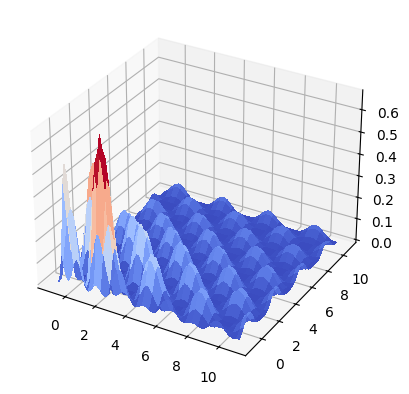

In [17]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x1 = np.arange(-1, 11, 0.2)
x2 = np.arange(-1, 11, 0.2)
X1, X2 = np.meshgrid(x1, x2)
Y = np.zeros((X1.shape[0], X1.shape[1]))


for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):

        x = np.array([X1[i, j], X2[i, j]])

        Y[i, j] = objectiveFunction(x)

surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
plt.show()

In [18]:
def evaluation(X):
    N = X.shape[0]
    scores = np.zeros(N)
    
    for i in range(N):
        scores[i] = objectiveFunction(X[i, :])
        
    return scores 

In [19]:
def plotIteration(X, score):
  ax.cla()
  ax.contour(X1, X2, Y, 50)
  ax.contour(X1, X2, Y, cmap=cm.coolwarm, levels=50)
  ax.plot(X[:, 0], X[:, 1], 'r+')
  ax.set_title('generatio {:}, best subject score {:.10f}'.format(t, score))
  display.display(plt.gcf())
  display.clear_output(wait=True)
  sleep(0.0001)

In [20]:
def localSearch(X, maxItr):
    X = np.array(X)
    X_scores = evaluation(X)
    
    for itr in range(maxItr):
        Z = X + np.random.randn(X.shape[0], X.shape[1])
        Z[Z<0] = 1e-15
        Z[Z > 10] = 10
        Z_scores = evaluation(Z)
        plotIteration(X, X_scores.max())
        X[Z_scores > X_scores] = Z[Z_scores > X_scores]
        X_scores [Z_scores > X_scores] = Z_scores[Z_scores > X_scores]
        
        return X

solution
[1.3919531e+00 1.0000000e-15]


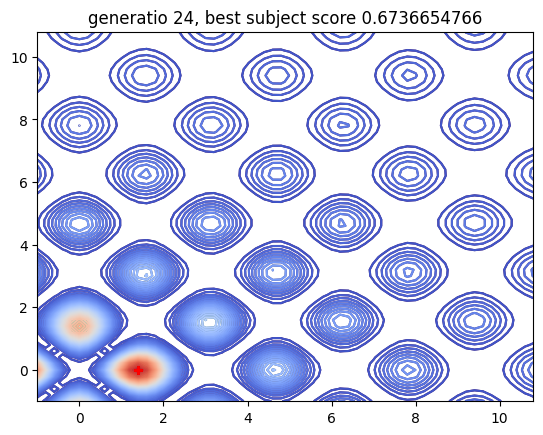

In [21]:
N, n = 100, 2
X = 10 * np.random.rand(N, n)

maxGenerations = 25
maxItr = 20
fig, ax = plt.subplots()

for t in range(maxGenerations):
    X_t = np.concatenate((localSearch(X, maxItr), X))
    scores_t = evaluation(X_t)
    X = X_t[np.argsort(-scores_t)[0:N], :]
    scores = evaluation(X)
    plotIteration(X, scores.max())
    
    scores = evaluation(X)
    print('solution')
    print(X[scores.argmax(), :])